# 一、前期工作

## 1.设置GPU

In [1]:
import tensorflow as tf 

In [2]:
gpus = tf.config.list_physical_devices("GPU")

In [3]:
if gpus:
    gpu0 = gpus[0]
    tf.config.experimental.set_memory_growth(gpu0, True)
    tf.config.set_visible_devices([gpu0], "GPU")

## 2.导入数据

In [4]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

## 3.归一化

### 数据归一化的作用

- 减小方差
- 加快收敛速度

In [6]:
# 将像素的值标准化至0到1区间内
train_images, test_images = train_images / 255.0, test_images / 255.0
# 查看数据维度信息
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## 4.可视化数据集图片

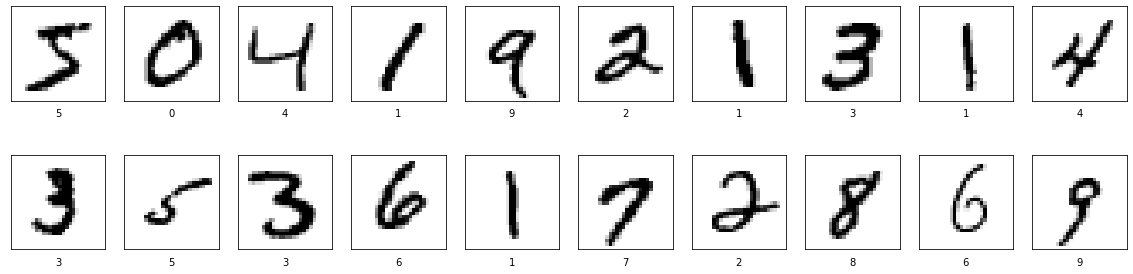

In [8]:
# 将数据集前20个图片可视化显示
# 进行图像大小为20宽、10(5)长的绘图（单位为英寸inch）
# (可能是屏幕分辨率的原因，这里我的长改成5)
plt.figure(figsize=(20, 5))
# 遍历MNIST数据集下标数值0~49
for i in range(20):
    # 将整个figure分成5行10列，绘制第i+1个子图
    plt.subplot(2, 10, i+1)
    # 设置x轴不显示刻度
    plt.xticks([])
    # 设置y轴不显示刻度
    plt.yticks([])
    # 设置不显示子图网格
    plt.grid(False)
    # 图像展示，cmp为颜色图谱，“plt.cm.binary”为matplotlib.cm中的色表
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # 设置x轴标签显示为图片对应的数字
    plt.xlabel(train_labels[i])
    
# 显示图片
plt.show()

## 5.调整图片格式

In [18]:
# 调整数据到我们需要的格式
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# print
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

# 二、构建CNN网络模型

**网络结构图：**
![CNN](./fig/cnn.jpg)

In [20]:
# 使用卷积网络来实现图像识别
# 卷积层：通过卷积操作对图像进行降维和特征提取
# 池化层：是一种非线性形式的下采样。主要用于特征降维，压缩数据和参数的数量，减小过拟合，同时提高模型的鲁棒性。
# 全连接层：在经过几个卷积和池化层之后，神经网络中的高级推理通过全连接层来完成。
model = models.Sequential([
    # 设置二维卷积层1，设置32个3*3的卷积核，activation参数将激活函数设置为ReLu函数，
    # input_shape参数将图层的输入形状设置为（28，28，1）
    # ReLu函数作为激活函数可以增强判定函数和整个神经网络的非线性特性，而本身不会改变卷积层
    # 相比其他函数来说，ReLu函数更青睐，因为够简单，能够提升网络的训练速度，而不会影响模型的泛化性
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 池化层1, 2*2采样
    layers.MaxPooling2D((2, 2)),
    # 设置二维卷积层2，设置64个3*3的卷积核，activation参数将激活函数设置为ReLu函数
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 池化层2, 2*2采样
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # 有十个手写数字
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

# 三、编译模型

In [23]:
# model.compile()方法用于在配置训练方法时，告知训练时用的优化器，损失函数和准确率评测标准
model.compile(
    # Adam 优化器
    optimizer='adam',
    # 设置交叉熵损失函数
    # from——logits为True时，会将y_pred转化为概率（softmax）
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    # 设置性能指标列表，将在模型训练时监控列表中的指标
    metrics=['accuracy'])

# 四、训练模型

In [24]:
history = model.fit(
    # 输入训练集图片
    train_images, 
    # 标签
    train_labels,
    # 设置10个epoch，每一个epoch都将会把所有的数据输入模型完成一次训练
    epochs=10,
    # 设置验证集
    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1399 - accuracy: 0.9577 - val_loss: 0.0497 - val_accuracy: 0.9837
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0361 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0332 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0328 - val_accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0115 - accuracy: 0.9961 - val_loss: 0.0268 - val_ac

# 五、预测
![predict](./fig/predict.jpg)

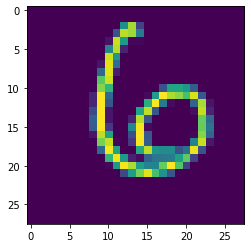

In [45]:
plt.imshow(test_images[100])

In [26]:
pre = model.predict(test_images)

In [46]:
pre[100]

array([  5.9135103, -14.301079 , -17.476717 , -11.305802 ,  -2.4223704,
        -1.7675155,  28.541172 , -16.614574 ,   6.7781134, -22.735596 ],
      dtype=float32)

In [29]:
test_images.shape[0]

10000

In [43]:
def predict_num(model, test_data, index):
    pre = model.predict(test_data)
    num, ph = 0, 0;
    for i, p in enumerate(pre[index]):
        if p > ph:
            ph = p
            num = i
            
    return num, ph

In [48]:
predict_num(model, test_images, 13)

(0, 26.312767)